In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV

In [208]:
df = pd.read_csv('data_cleaned.csv')

In [209]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4247 entries, 0 to 4246
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   district       4247 non-null   object
 1   neighborhood   4247 non-null   object
 2   room           4247 non-null   int64 
 3   living_room    4247 non-null   int64 
 4   area           4247 non-null   int64 
 5   age            4247 non-null   int64 
 6   floor          4247 non-null   int64 
 7   price          4247 non-null   int64 
 8   area_per_room  4247 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 298.7+ KB
None


In [219]:
df['district'] = df['district'].astype('category')
df['neighborhood'] = df['neighborhood'].astype('category')
df['room'] = df['room'].astype('int')
df['living_room'] = df['living_room'].astype('int')
df['area'] = df['area'].astype('int')
df['age'] = df['age'].astype('int')
df['floor'] = df['floor'].astype('int')
df['price'] = df['price'].astype('int')
df['area_per_room'] = df['area_per_room'].astype('int')

In [220]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4247 entries, 0 to 4246
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   district       4247 non-null   category
 1   neighborhood   4247 non-null   category
 2   room           4247 non-null   int32   
 3   living_room    4247 non-null   int32   
 4   area           4247 non-null   int32   
 5   age            4247 non-null   int32   
 6   floor          4247 non-null   int32   
 7   price          4247 non-null   int32   
 8   area_per_room  4247 non-null   int32   
dtypes: category(2), int32(7)
memory usage: 150.3 KB
None


In [221]:
df.head()

,district,neighborhood,room,living_room,area,age,floor,price,area_per_room
0,sisli,halide_edip_adivar,1,1,70,22,-3,16000,35
1,sisli,19_mayis,2,1,105,22,4,26000,35
2,beykoz,ortacesme,2,1,75,35,1,14000,25
3,cekmekoy,catalmese,2,1,80,8,2,22000,26
4,besiktas,akat,3,1,124,34,6,68000,31


In [222]:
categorical_features = [ 'district', 'neighborhood']
numerical_features = ['room', 'living_room', 'area', 'age', 'floor',"area_per_room"]

In [223]:
full_pipeline = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [224]:
X = df.drop('price', axis=1)
y = df['price']

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [226]:
model = Pipeline([
    ('preparation', full_pipeline),
    ('model', LinearRegression())
])

In [227]:
model.fit(X_train, y_train)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['room', 'living_room',
                                                   'area', 'age', 'floor',
                                                   'area_per_room']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['district',
                                                   'neighborhood'])])),
                ('model', LinearRegression())])

In [228]:


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)



In [229]:


print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")



MSE: 72853839.78601083
RMSE: 8535.446080083386
R^2: 0.6029486163547795


In [230]:
feature_importances = model.named_steps['model'].coef_
print(len(feature_importances))
print(feature_importances)

540
[  1138.86939855      0.           4031.41669504  -4556.59803875
   1407.24187741    651.60994833  18506.9834337  -16107.48722778
   9590.30813869 -14574.90078822  -9048.33011487  -2941.97167856
   6747.5216908  -11519.07029026   -496.57163465  19743.43520155
  -2297.70458484  -8871.33993184  13571.61263217   -546.49285144
   -301.78964668  -4054.89477963  -7932.97232805 -14066.70638831
  -2485.60754158   1255.68350045  -4761.08219656   1897.44726628
  19909.03644602    346.15566655  -4125.74099181  -4421.85787911
   8128.13514097   4672.27804722  -4467.70688592   5170.46947301
   4800.73922755  -8482.06893502  14290.73814069 -11249.07071443
   -853.60181106   1275.73850983   -374.40865943   2901.73625889
   1173.35908574   2842.22376723   5306.01095312  -4415.43921182
 -10739.08459857   3456.82171513    716.02212904  24178.2344645
  -7218.93965336  -3672.86486363   6739.47330898  -1720.35649691
   1037.9710907  -15586.67123031  16150.17319973  -2906.62831513
  -2472.26975047   128

In [231]:
print("Numerical Features")
for i in range(len(numerical_features)):
    print(numerical_features[i], feature_importances[i])

Numerical Features
room 1138.8693985479586
living_room 0.0
area 4031.4166950441318
age -4556.598038746795
floor 1407.241877413174
area_per_room 651.609948328956


In [232]:
print("Categorical Features")
for i in range(len(categorical_features)):
    for j in range(len(model.named_steps['preparation'].transformers_[1][1].categories_[i])):
        print(model.named_steps['preparation'].transformers_[1][1].categories_[i][j], feature_importances[len(numerical_features) + j])

Categorical Features
adalar 18506.983433698828
arnavutkoy -16107.487227779733
atasehir 9590.30813868795
avcilar -14574.900788220513
bagcilar -9048.330114871338
bahcelievler -2941.9716785562996
bakirkoy 6747.521690796494
basaksehir -11519.070290259177
bayrampasa -496.57163465441977
besiktas 19743.435201549968
beykoz -2297.7045848420603
beylikduzu -8871.339931836577
beyoglu 13571.612632169037
buyukcekmece -546.4928514436893
catalca -301.7896466781796
cekmekoy -4054.8947796268108
esenler -7932.972328048558
esenyurt -14066.706388312947
eyupsultan -2485.607541583894
fatih 1255.6835004513048
gaziosmanpasa -4761.0821965575005
gungoren 1897.4472662789103
kadikoy 19909.036446024744
kagithane 346.1556665466558
kartal -4125.7409918107105
kucukcekmece -4421.857879106654
maltepe 8128.135140965778
pendik 4672.278047215797
sancaktepe -4467.706885917155
sariyer 5170.46947300984
sile 4800.73922755404
silivri -8482.068935017893
sisli 14290.738140691374
sultanbeyli -11249.07071442578
sultangazi -853.6018

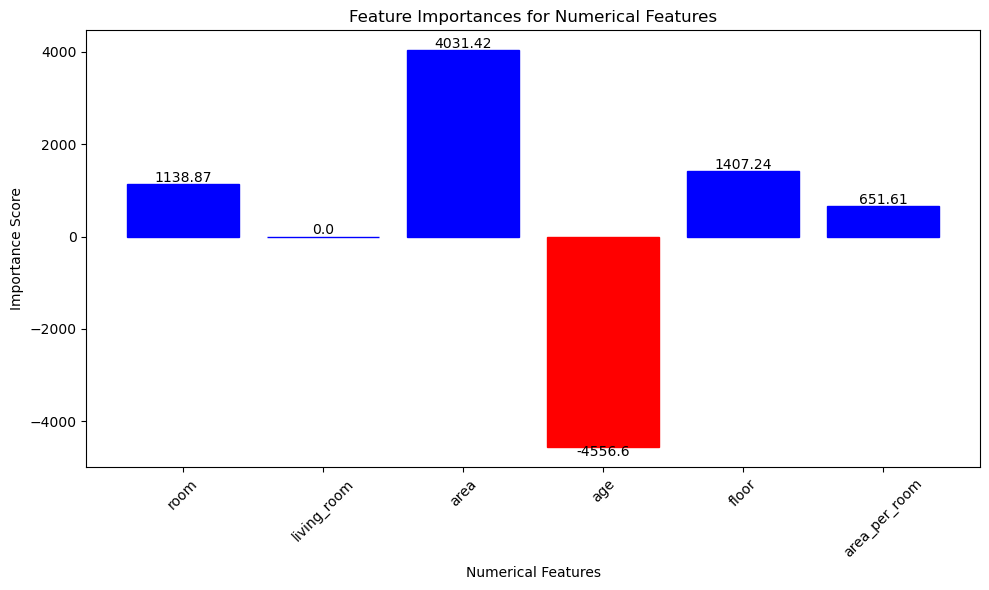

In [233]:
numerical_features = ['room', 'living_room', 'area', 'age', 'floor', 'area_per_room']
feature_importances = [1138.8693985479586, 0.0, 4031.4166950441318, -4556.598038746795, 1407.241877413174, 651.609948328956]

# Grafik oluşturma
plt.figure(figsize=(10, 6))
bars = plt.bar(numerical_features, feature_importances, color=['blue' if x >=0 else 'red' for x in feature_importances])

# Pozitif ve negatif değerler için farklı renkler
for bar in bars:
    if bar.get_height() < 0:
        bar.set_color('red')
    else:
        bar.set_color('blue')

# Eksen etiketleri ve başlık
plt.xlabel('Numerical Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances for Numerical Features')

# Değerleri çubukların üzerine yazdırma
for i, v in enumerate(feature_importances):
    plt.text(i, v + 50 if v >=0 else v - 200, str(round(v, 2)), ha='center')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

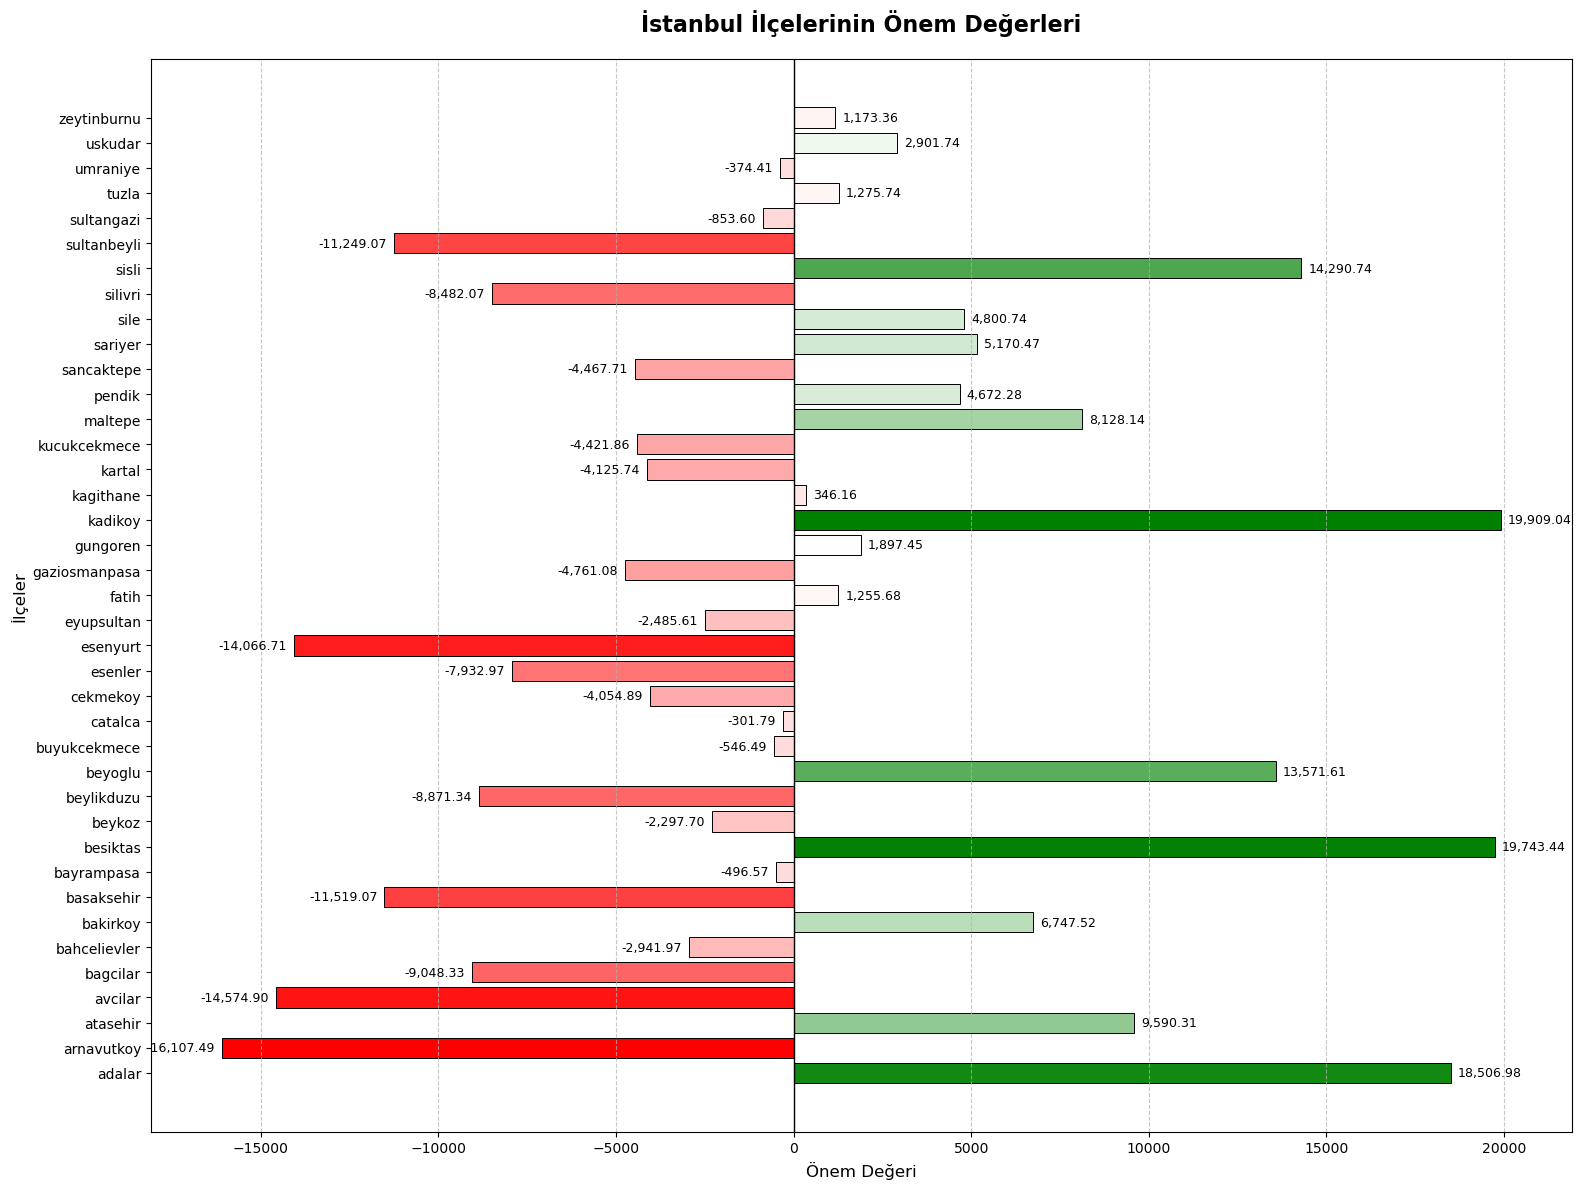

In [234]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Veriler
districts = [
    'adalar', 'arnavutkoy', 'atasehir', 'avcilar', 'bagcilar', 'bahcelievler',
    'bakirkoy', 'basaksehir', 'bayrampasa', 'besiktas', 'beykoz', 'beylikduzu',
    'beyoglu', 'buyukcekmece', 'catalca', 'cekmekoy', 'esenler', 'esenyurt',
    'eyupsultan', 'fatih', 'gaziosmanpasa', 'gungoren', 'kadikoy', 'kagithane',
    'kartal', 'kucukcekmece', 'maltepe', 'pendik', 'sancaktepe', 'sariyer',
    'sile', 'silivri', 'sisli', 'sultanbeyli', 'sultangazi', 'tuzla',
    'umraniye', 'uskudar', 'zeytinburnu'
]

importance = [
    18506.98, -16107.49, 9590.31, -14574.90, -9048.33, -2941.97,
    6747.52, -11519.07, -496.57, 19743.44, -2297.70, -8871.34,
    13571.61, -546.49, -301.79, -4054.89, -7932.97, -14066.71,
    -2485.61, 1255.68, -4761.08, 1897.45, 19909.04, 346.16,
    -4125.74, -4421.86, 8128.14, 4672.28, -4467.71, 5170.47,
    4800.74, -8482.07, 14290.74, -11249.07, -853.60, 1275.74,
    -374.41, 2901.74, 1173.36
]

# Renk haritası oluşturma
colors = LinearSegmentedColormap.from_list('rg', ["red", "white", "green"], N=256)

# Figür boyutu
plt.figure(figsize=(16, 12))

# Çubuk grafik
bars = plt.barh(districts, importance, 
                color=colors((importance - np.min(importance)) / 
                           (np.max(importance) - np.min(importance))),
                edgecolor='black', linewidth=0.7)

# Eksen ve başlık ayarları
plt.title('İstanbul İlçelerinin Önem Değerleri', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Önem Değeri', fontsize=12)
plt.ylabel('İlçeler', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Değer etiketleri
for bar in bars:
    width = bar.get_width()
    if width >= 0:
        plt.text(width + 200, bar.get_y() + bar.get_height()/2, 
                f'{width:,.2f}', 
                va='center', ha='left', fontsize=9)
    else:
        plt.text(width - 200, bar.get_y() + bar.get_height()/2, 
                f'{width:,.2f}', 
                va='center', ha='right', fontsize=9)

# Sıfır çizgisi
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)

# X ekseni limitleri
buffer = max(abs(np.min(importance)), abs(np.max(importance))) * 0.1
plt.xlim(min(importance) - buffer, max(importance) + buffer)

plt.tight_layout()
plt.show()

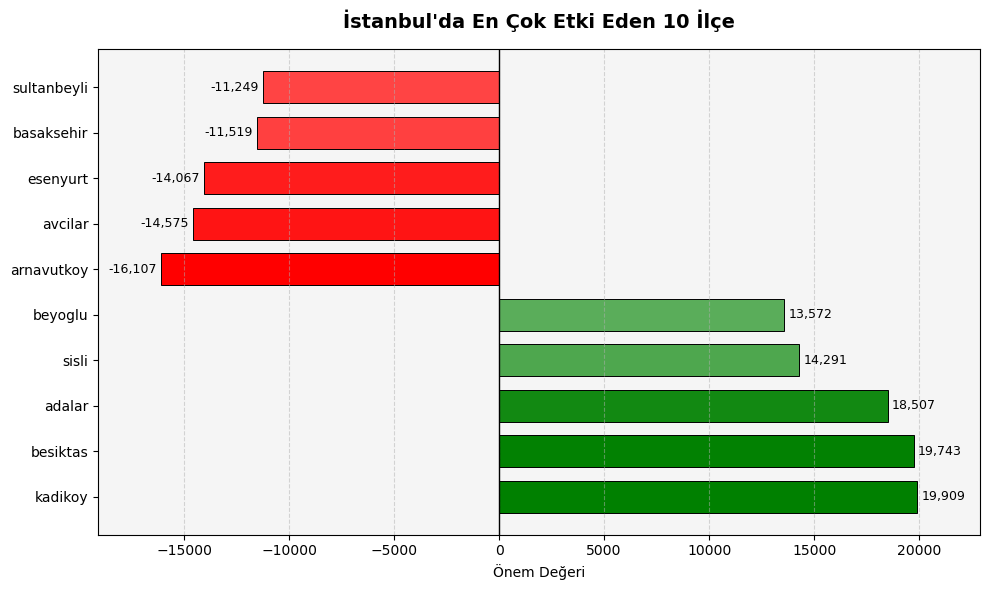

In [235]:
# En etkili 5 pozitif ve 5 negatif ilçe seçme
combined = list(zip(districts, importance))
sorted_combined = sorted(combined, key=lambda x: x[1], reverse=True)

top_positive = sorted_combined[:5]
top_negative = sorted(sorted_combined[-5:], key=lambda x: x[1])

selected = top_positive + top_negative
selected_districts = [x[0] for x in selected]
selected_importance = [x[1] for x in selected]

# Renk haritası
colors = LinearSegmentedColormap.from_list('rg', ["red", "white", "green"], N=256)

# Figür boyutu (daha küçük)
plt.figure(figsize=(10, 6))

# Çubuk grafik
bars = plt.barh(selected_districts, selected_importance, 
                color=colors((selected_importance - np.min(selected_importance)) / 
                           (np.max(selected_importance) - np.min(selected_importance))),
                edgecolor='black', linewidth=0.7, height=0.7)

# Grafik özelleştirme
plt.title('İstanbul\'da En Çok Etki Eden 10 İlçe', fontsize=14, pad=15, fontweight='bold')
plt.xlabel('Önem Değeri', fontsize=10)
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Değer etiketleri
for bar in bars:
    width = bar.get_width()
    if width >= 0:
        plt.text(width + 200, bar.get_y() + bar.get_height()/2, 
                f'{width:,.0f}', 
                va='center', ha='left', fontsize=9)
    else:
        plt.text(width - 200, bar.get_y() + bar.get_height()/2, 
                f'{width:,.0f}', 
                va='center', ha='right', fontsize=9)

# Sıfır çizgisi
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)

# X ekseni limitleri
buffer = max(abs(np.min(selected_importance)), abs(np.max(selected_importance))) * 0.15
plt.xlim(min(selected_importance) - buffer, max(selected_importance) + buffer)

# Arka plan rengi
plt.gca().set_facecolor('#f5f5f5')

plt.tight_layout()
plt.show()